In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

In [6]:
df_new = df.drop(["Country","Happiness Rank"],axis=1)

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

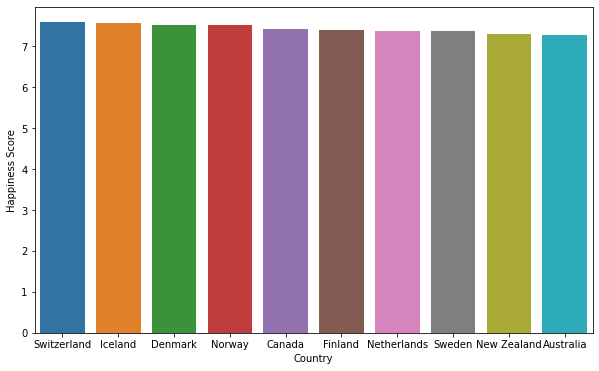

In [7]:
plt.figure(figsize=(10,6))
df_happiest = df.sort_values(by="Happiness Score",ascending=False).iloc[0:10,:]
sns.barplot(x="Country",y="Happiness Score",data=df_happiest)

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

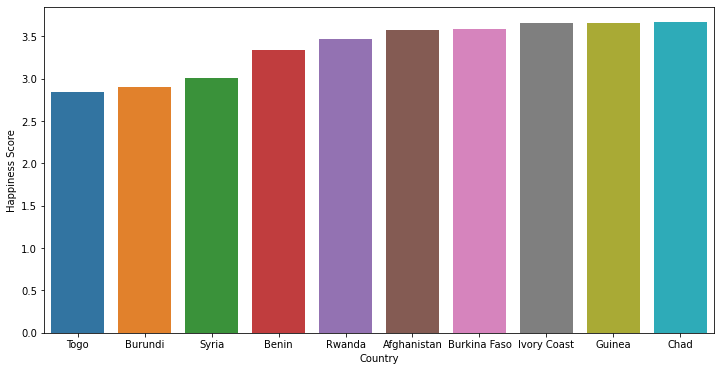

In [8]:
plt.figure(figsize=(12,6))
df_happiest = df.sort_values(by="Happiness Score",ascending=True).iloc[0:10,:]
sns.barplot(x="Country",y="Happiness Score",data=df_happiest)

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

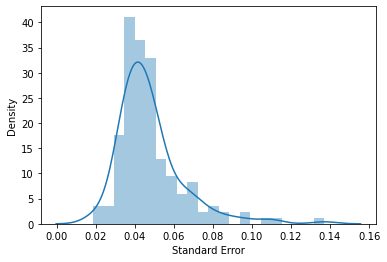

In [9]:
sns.distplot(df_new["Standard Error"])

In [10]:
df_new.columns

Index(['Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

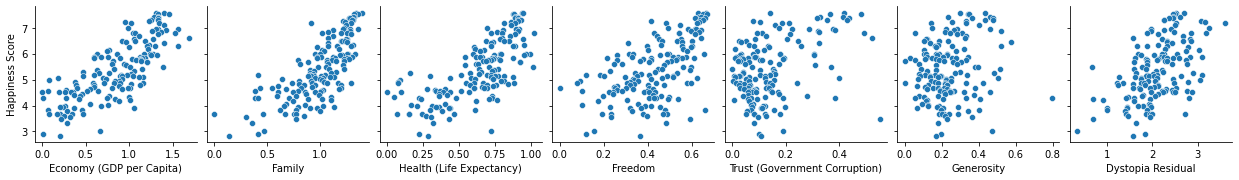

In [11]:
sns.pairplot(data=df_new,y_vars="Happiness Score",x_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

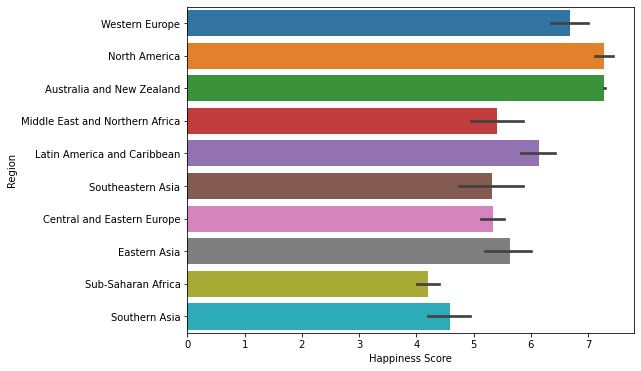

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_new["Happiness Score"],y=df_new["Region"])

<AxesSubplot:xlabel='Freedom', ylabel='Region'>

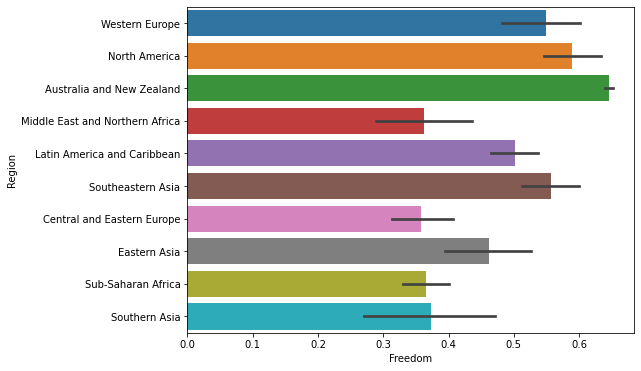

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_new["Freedom"],y=df_new["Region"])

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.5+ KB


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_new["Region"] = le.fit_transform(df_new["Region"])

In [16]:
X = df_new.drop("Happiness Score",axis=1)
y = df["Happiness Score"]

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled,y)
reg.score(X_scaled,y)

0.999999943060637

<AxesSubplot:>

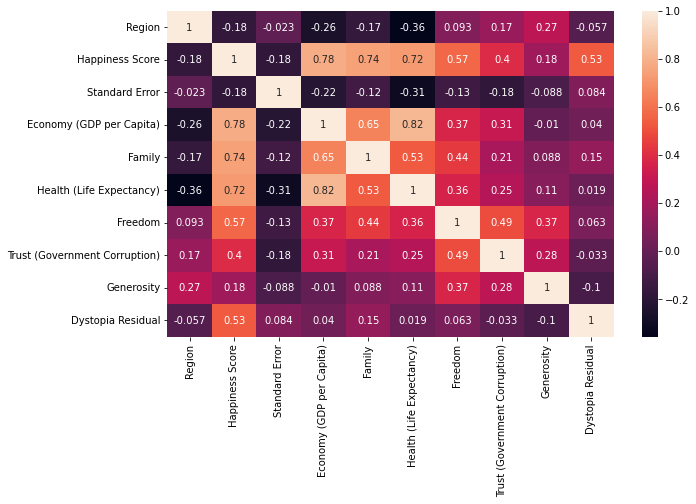

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),annot=True)

In [21]:
X_feature = X.drop("Economy (GDP per Capita)",axis=1)
scaler = StandardScaler()
X_feature = scaler.fit_transform(X_feature)
reg = LinearRegression()
reg.fit(X_feature,y)
reg.score(X_feature,y)

0.9700832186839738